In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn")

In [2]:
stock2index = {
    "Tesco": "TSCO.L",
    "HSBC": "HSBC",
    "Microsoft": "MSFT",
    "Netflix": "NFLX",
    "Google": "GOOG",
    "BP": "BP",
    "EasyJet": "EZJ.L",
    "Aviva": "AV.L",
    "Legal&General": "LGEN.L",
    "IBM": "IBM",
    "Fairfax": "FFH.TO",
    "Blackstone": "BX",
    "LloydsBank": "LYG",
    "JPMorgan": "JPM"
}

In [3]:
stock_list = [v for v in stock2index.values()]

df = yf.download(stock_list, "2016-01-01")

[*********************100%***********************]  14 of 14 completed


In [8]:
returns = df["Adj Close"].pct_change().dropna().rename(columns={v:k for k, v in stock2index.items()})

returns.head(15)

,Aviva,BP,Blackstone,EasyJet,Fairfax,Google,HSBC,IBM,JPMorgan,Legal&General,LloydsBank,Microsoft,Netflix,Tesco
Date,,,,,,,,,,,,,,
2016-01-05,0.004823,-0.004185,-0.027979,0.014393,-0.006558,0.000998,-0.002333,-0.000736,0.001729,0.009649,-0.004629,0.004562,-0.020917,0.015114
2016-01-06,-0.009400,-0.020368,-0.030206,-0.002270,0.006898,0.001400,-0.034546,-0.005006,-0.014436,-0.020260,-0.027907,-0.018165,0.093071,-0.019737
2016-01-07,-0.027054,-0.028713,-0.033346,-0.050626,0.016426,-0.023170,-0.020985,-0.017089,-0.040439,-0.034725,-0.023924,-0.034783,-0.026513,-0.016601
2016-01-08,-0.010376,-0.017669,-0.033358,0.026363,-0.005986,-0.016410,-0.006595,-0.009258,-0.022399,-0.005659,0.000000,0.003067,-0.027671,0.055316
2016-01-11,-0.006710,-0.002421,-0.033333,0.002919,0.008019,0.002184,0.007745,0.012155,-0.001528,-0.004878,0.009804,-0.000573,0.032139,-0.009871
2016-01-12,0.014777,-0.006588,0.021095,0.001164,0.021582,0.014022,0.004941,-0.002477,0.002210,0.003676,-0.009709,0.009178,0.014004,0.067033
2016-01-13,0.002288,0.004189,-0.028605,-0.017442,-0.034464,-0.035134,-0.017481,-0.013018,-0.027476,0.007733,-0.046568,-0.021599,-0.085950,0.019974
2016-01-14,-0.014944,0.071603,0.048671,-0.028402,0.025942,0.020212,0.012510,0.013265,0.014998,-0.009693,0.007712,0.028466,0.004692,0.061276
2016-01-15,-0.021281,-0.054168,-0.042122,-0.018270,0.014880,-0.028361,-0.049149,-0.021669,-0.019932,-0.024878,-0.035714,-0.039917,-0.028208,-0.021131


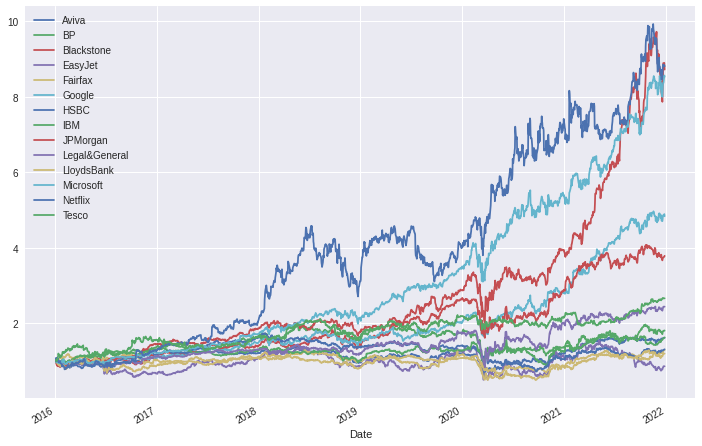

In [9]:
returns.cumsum().apply(np.exp).plot(figsize=(12, 8))
plt.show()

In [10]:
simple = np.exp(returns) - 1
simple

,Aviva,BP,Blackstone,EasyJet,Fairfax,Google,HSBC,IBM,JPMorgan,Legal&General,LloydsBank,Microsoft,Netflix,Tesco
Date,,,,,,,,,,,,,,
2016-01-05,0.004835,-0.004177,-0.027592,0.014497,-0.006536,0.000998,-0.002330,-0.000735,0.001731,0.009695,-0.004619,0.004572,-0.020699,0.015229
2016-01-06,-0.009356,-0.020162,-0.029754,-0.002267,0.006921,0.001401,-0.033956,-0.004993,-0.014332,-0.020056,-0.027521,-0.018001,0.097539,-0.019543
2016-01-07,-0.026692,-0.028305,-0.032796,-0.049366,0.016562,-0.022904,-0.020766,-0.016944,-0.039633,-0.034129,-0.023640,-0.034185,-0.026164,-0.016464
2016-01-08,-0.010322,-0.017514,-0.032808,0.026714,-0.005968,-0.016276,-0.006573,-0.009215,-0.022150,-0.005643,0.000000,0.003072,-0.027292,0.056875
2016-01-11,-0.006687,-0.002418,-0.032784,0.002923,0.008052,0.002186,0.007776,0.012229,-0.001526,-0.004866,0.009852,-0.000573,0.032661,-0.009822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-22,0.006460,0.012947,0.059128,0.006774,0.008973,0.019099,0.008208,0.006066,0.003916,0.011484,0.016666,0.018221,0.015526,-0.003288
2021-12-23,0.007409,0.007499,0.035002,0.029104,0.007576,0.001318,0.009163,0.006805,0.003580,0.011700,0.020533,0.004482,-0.000244,0.002786
2021-12-24,0.001222,0.000000,0.000000,0.019751,0.044651,0.000000,0.000000,0.000000,0.000000,0.003388,0.000000,0.000000,0.000000,-0.001559


## Leverage & Margin Trading

In [11]:
symbol = "Microsoft"

In [12]:
instr = simple[symbol].to_frame().copy()

instr

,Microsoft
Date,
2016-01-05,0.004572
2016-01-06,-0.018001
2016-01-07,-0.034185
2016-01-08,0.003072
2016-01-11,-0.000573
...,...
2021-12-22,0.018221
2021-12-23,0.004482
2021-12-24,0.000000


In [13]:
leverage = 2

instr["lev_returns"] = instr[symbol].mul(leverage)
instr

,Microsoft,lev_returns
Date,,
2016-01-05,0.004572,0.009145
2016-01-06,-0.018001,-0.036002
2016-01-07,-0.034185,-0.068370
2016-01-08,0.003072,0.006143
2016-01-11,-0.000573,-0.001146
...,...,...
2021-12-22,0.018221,0.036443
2021-12-23,0.004482,0.008964
2021-12-24,0.000000,0.000000


In [14]:
instr["lev_returns"] = np.where(instr["lev_returns"] < -1, -1, instr["lev_returns"])

instr

,Microsoft,lev_returns
Date,,
2016-01-05,0.004572,0.009145
2016-01-06,-0.018001,-0.036002
2016-01-07,-0.034185,-0.068370
2016-01-08,0.003072,0.006143
2016-01-11,-0.000573,-0.001146
...,...,...
2021-12-22,0.018221,0.036443
2021-12-23,0.004482,0.008964
2021-12-24,0.000000,0.000000


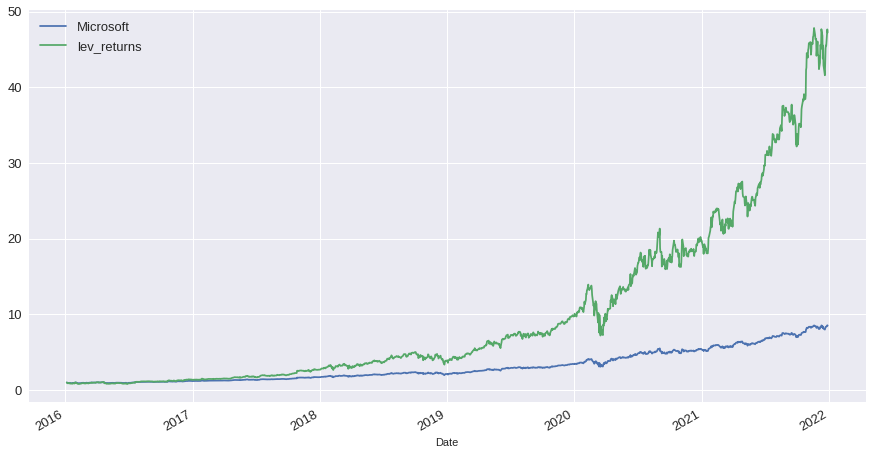

In [15]:
instr.add(1).cumprod().plot(figsize=(15,8), fontsize=13)
plt.legend(fontsize=13)
plt.show()

## Finding the optimal degree of leverage

In [36]:
lev_range = np.arange(1,6,0.01)
lev_range

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99, 2.  , 2.01, 2.02, 2.03, 2.04, 2.05, 2.06, 2.07, 2.08, 2.09,
       2.1 , 2.11, 2.12, 2.13, 2.14, 2.15, 2.16, 2.17, 2.18, 2.19, 2.2 ,
       2.21, 2.22, 2.23, 2.24, 2.25, 2.26, 2.27, 2.28, 2.29, 2.3 , 2.31,
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.

In [37]:
multiple = []
for l in lev_range:
    lev_returns = simple[symbol].mul(l)
    lev_returns = pd.Series(np.where(lev_returns < -1, -1, lev_returns))
    multiple.append(lev_returns.add(1).prod())
results = pd.DataFrame(data={"leverage": list(lev_range), "multiple": multiple})

In [38]:
results.set_index("leverage", inplace=True)

results

,multiple
leverage,
1.00,8.528267
1.01,8.694100
1.02,8.862777
1.03,9.034337
1.04,9.208822
...,...
5.95,379.203918
5.96,376.494319
5.97,373.766121


In [39]:
results.min()

multiple    8.528267
dtype: float64

In [40]:
max_multiple = results.max()

max_multiple

multiple    513.755386
dtype: float64

In [41]:
optimal_lev = results.idxmax()
optimal_lev

multiple    5.02
dtype: float64

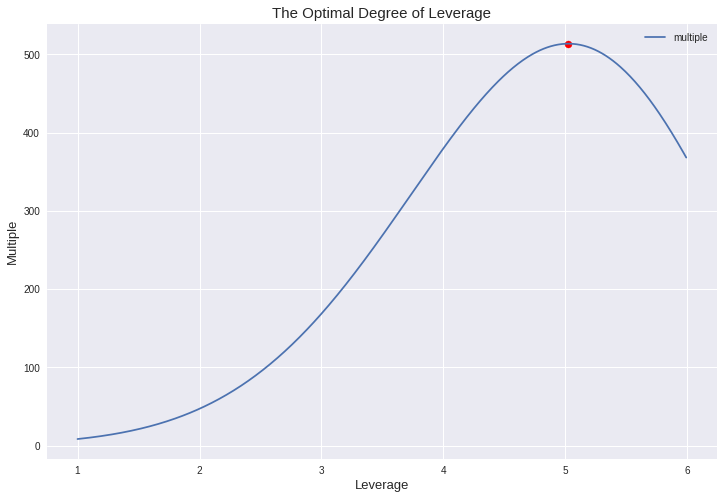

In [43]:
results.plot(figsize=(12,8))
plt.scatter(x=optimal_lev, y=max_multiple, color="r", s=50)
plt.xlabel("Leverage", fontsize=13)
plt.ylabel("Multiple", fontsize=13)
plt.title("The Optimal Degree of Leverage", fontsize=15)
plt.show()

## Kelly Criterion

In [44]:
instr = simple[symbol].to_frame().copy()
mu = instr.mean()
var = instr.var()

In [46]:
kelly = mu / var
kelly

Microsoft    5.48165
dtype: float64